In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = sio.loadmat('/content/drive/MyDrive/Colab Notebooks/Machine Learning/16QAM_3x16GBd_consY250km_00010.mat')
df = pd.DataFrame(np.transpose(data['const_Y']), columns = ['data'])
df.head()

,data
0,0.195375-0.547002j
1,0.536804+0.269858j
2,-0.200644+0.292516j
3,-0.641657+0.556165j
4,-0.240042+0.536697j


In [3]:
Xr = np.real(df['data'])
Xi = np.imag(df['data'])

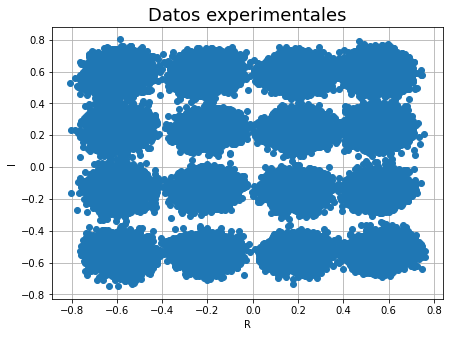

In [4]:
plt.figure(figsize=(7,5))
plt.title('Datos experimentales', fontsize = 18)
plt.plot(Xr, Xi, 'o')
plt.xlabel('R')
plt.ylabel('I')
plt.grid()
plt.show()

In [5]:
X = np.transpose(np.array([Xr, Xi]))

In [6]:
num_clusters = 16
cent_init = np.array([[-0.6,0.6], [-0.6,0.2], [-0.6,-0.6],[-0.6,-0.2],
                      [-0.2,0.6],[-0.2,0.2],[-0.2,-0.6],[-0.2,-0.2],
                      [0.6,0.6],[0.6,0.2],[0.6,-0.6],[0.6,-0.2],[0.2,0.6],
                      [0.2,0.2],[0.2,-0.6],[0.2,-0.2]])

In [7]:
model = KMeans(n_clusters = num_clusters, init = cent_init)
model.fit(X)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


KMeans(init=array([[-0.6,  0.6],
       [-0.6,  0.2],
       [-0.6, -0.6],
       [-0.6, -0.2],
       [-0.2,  0.6],
       [-0.2,  0.2],
       [-0.2, -0.6],
       [-0.2, -0.2],
       [ 0.6,  0.6],
       [ 0.6,  0.2],
       [ 0.6, -0.6],
       [ 0.6, -0.2],
       [ 0.2,  0.6],
       [ 0.2,  0.2],
       [ 0.2, -0.6],
       [ 0.2, -0.2]]),
       n_clusters=16)

In [8]:
centers = model.cluster_centers_
labels = model.labels_

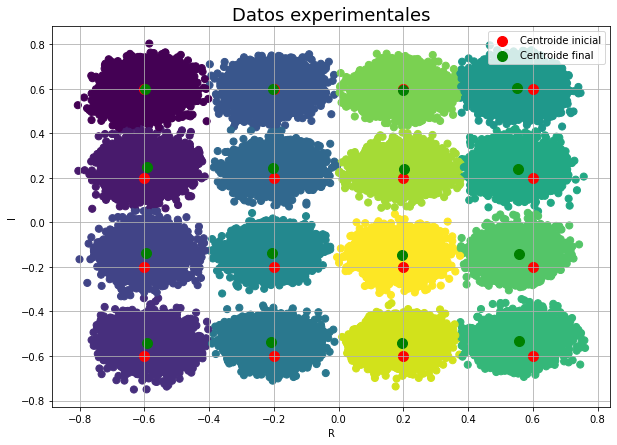

In [9]:
plt.figure(figsize=(10,7))
plt.title('Datos experimentales', fontsize = 18)
plt.scatter(Xr, Xi, s = 50, c = labels, marker = 'o')
plt.scatter(cent_init[:, 0], cent_init[:, 1], s = 100, label = 'Centroide inicial', marker = 'o', color = 'red')
plt.scatter(centers[:, 0], centers[:, 1], s = 100, label = 'Centroide final', marker = 'o', color = 'green')
plt.xlabel('R')
plt.ylabel('I')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

In [10]:
model.labels_

array([14,  9,  5, ...,  7,  3,  2], dtype=int32)

### Se añade la trama transmitida

In [11]:
data_tx = sio.loadmat('/content/drive/MyDrive/Colab Notebooks/Machine Learning/2x16QAM_16GBd.mat')
data_tx = data_tx['Constellation'][0][0][0][0]
df_tx = pd.DataFrame(np.transpose(data_tx), columns = ['tx'])
df_tx.head()

,tx
0,3.0+3.0j
1,-3.0-3.0j
2,3.0-1.0j
3,-3.0+3.0j
4,-3.0+3.0j


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


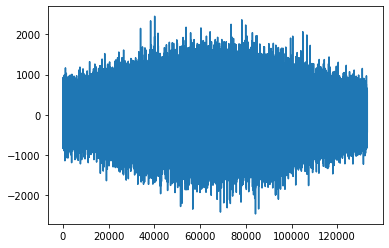

In [12]:
Cxy = np.correlate(df['data'], df_tx['tx'], mode = 'same')
plt.plot(Cxy)

In [13]:
cont = 0
inicio = 0
for i, item in enumerate(Cxy):
  if item > cont:
    cont = item
    inicio = i
print('El inicio de la trama es:', inicio)

El inicio de la trama es: 40143


In [14]:
aux = []
for i in range(len(df_tx['tx'])-inicio):
  aux.append(df_tx['tx'][i+inicio])
long_rest = len(df['data'])-(len(df_tx['tx'])-inicio)
for k in range(long_rest):
  aux.append(df_tx['tx'][k])
y = aux

In [15]:
y = []
for i in aux:
  if i == -3+3j:
    y.append(0)
  elif i == -3+1j:
    y.append(1)
  elif i == -3-3j:
    y.append(2)
  elif i == -3-1j:
    y.append(3)
  elif i == -1+3j:
    y.append(4)
  elif i == -1+1j:
    y.append(5)
  elif i == -1-3j:
    y.append(6)
  elif i == -1-1j:
    y.append(7)
  elif i == 3+3j:
    y.append(8)
  elif i == 3+1j:
    y.append(9)
  elif i == 3-3j:
    y.append(10)
  elif i == 3-1j:
    y.append(11)
  elif i == 1+3j:
    y.append(12)
  elif i == 1+1j:
    y.append(13)
  elif i == 1-3j:
    y.append(14)
  elif i == 1-1j:
    y.append(15)

In [16]:
def SymbolErrorRate(sym_rx, sym_tx):
  error = 0
  for i, rx in enumerate(sym_rx):
    if rx != sym_tx[i]:
      error += 1
  SER = error / len(sym_tx)
  return SER, error

In [17]:
def BitErrorRate(sym_rx, sym_tx):
  sym_rx_bin = ''.join([f'{sym:04b}' for sym in sym_rx])
  sym_tx_bin = ''.join([f'{sym:04b}' for sym in sym_tx])

  error = 0
  for i in range(len(sym_tx_bin)):
    if sym_rx_bin[i] != sym_tx_bin[i]:
      error += 1
  BER = error / len(sym_tx_bin)
  return BER, error

In [24]:
print(model.labels_)
print(y)
print(df_tx['tx'][inicio])

[14  9  5 ...  7  3  2]
[12, 13, 13, 8, 14, 10, 2, 14, 10, 0, 12, 4, 6, 4, 8, 1, 14, 15, 12, 8, 15, 7, 12, 3, 1, 7, 2, 7, 13, 15, 15, 1, 4, 13, 2, 6, 6, 11, 11, 12, 8, 6, 6, 15, 8, 0, 2, 15, 14, 9, 15, 8, 14, 15, 10, 13, 7, 4, 2, 9, 1, 10, 0, 4, 9, 7, 12, 6, 3, 0, 6, 1, 11, 12, 0, 14, 10, 6, 6, 1, 7, 6, 9, 12, 5, 11, 0, 4, 14, 10, 15, 4, 4, 6, 6, 12, 15, 4, 8, 8, 4, 15, 14, 5, 1, 2, 8, 0, 0, 1, 1, 6, 11, 12, 14, 0, 10, 13, 5, 3, 8, 3, 7, 8, 10, 5, 10, 15, 15, 11, 14, 9, 2, 0, 2, 5, 5, 0, 10, 9, 13, 8, 14, 2, 13, 3, 2, 10, 3, 11, 10, 9, 13, 2, 4, 9, 14, 9, 11, 7, 11, 7, 4, 7, 9, 8, 15, 7, 12, 7, 5, 6, 1, 7, 7, 2, 8, 0, 11, 15, 0, 12, 10, 4, 4, 8, 3, 3, 4, 10, 2, 9, 4, 7, 14, 8, 13, 10, 8, 10, 7, 3, 2, 10, 5, 6, 1, 0, 6, 3, 0, 11, 4, 14, 3, 5, 15, 4, 4, 3, 14, 2, 3, 1, 13, 9, 1, 12, 15, 11, 11, 9, 13, 3, 3, 12, 10, 7, 9, 3, 4, 3, 8, 10, 7, 2, 11, 9, 5, 6, 1, 13, 13, 1, 13, 2, 1, 12, 6, 12, 12, 3, 4, 6, 9, 8, 8, 10, 9, 13, 12, 7, 10, 4, 5, 13, 8, 5, 10, 9, 15, 13, 2, 14, 7, 6, 7, 15, 8, 1

In [19]:
SER_test, error_SER = SymbolErrorRate(model.labels_, y)
print(f'SER: {SER_test}, Error sym: {error_SER}')

BER_test, error_BER = BitErrorRate(model.labels_, y)
print(f'BER: {BER_test}, Error Bit: {error_BER}')

SER: 0.9367375808348031, Error sym: 101977
BER: 0.49934551366843033, Error Bit: 217443
